In [69]:
# Import libraries and dependencies
from os import getenv
import pandas as pd
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
import numpy as np
from datetime import date, timedelta
from pathlib import Path

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

#neural network imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [70]:
def get_bars_alpaca(start_date=str(date.today()-timedelta(days=365*5)),end_date=str(date.today()-timedelta(days=1)),ticker='SOYB'):
    load_dotenv()
    alpaca_api_key=getenv('ALPACA_API_KEY')
    secret_key=getenv('ALPACA_SECRET_KEY')
    if type(alpaca_api_key) == 0:
        raise Exception("No ALPACA API KEY was loaded. Please save a .env file containing an ALPACA_API_KEY in the local directory.")
    if type(secret_key) == 0:
        raise Exception("No ALPACA SECRET KEY was loaded. Please save a .env file containing an ALPACA_SECRET_KEY in the local directory.")
    api=REST(key_id=alpaca_api_key,secret_key=secret_key)
    df=api.get_bars("SOYB", TimeFrame.Day, start_date, end_date, adjustment='raw').df
    return(df)



data_df = get_bars_alpaca()
data_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-03-28 04:00:00+00:00,18.66,18.6600,18.5401,18.6000,14027,32,18.613011
2018-03-29 04:00:00+00:00,18.57,19.1124,18.5100,19.0500,51977,176,18.942040
2018-04-02 04:00:00+00:00,19.10,19.1400,18.8811,18.9400,12591,63,19.038768
2018-04-03 04:00:00+00:00,19.03,19.0600,18.9232,18.9248,17549,65,18.990660
2018-04-04 04:00:00+00:00,18.39,18.6250,18.2100,18.5800,65647,277,18.418577
...,...,...,...,...,...,...,...
2023-03-20 04:00:00+00:00,27.02,27.1405,26.8000,27.0900,21903,209,27.035517
2023-03-21 04:00:00+00:00,27.43,27.4300,26.8000,26.8100,19168,257,26.922124
2023-03-22 04:00:00+00:00,26.67,26.6700,26.3201,26.3300,21120,248,26.434687


In [71]:
data_df['test target'] = np.where(data_df['open'] < data_df['close'], 1, 0)

In [72]:
df = pd.DataFrame(data_df)
df.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'target']
df

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,target
timestamp,,,,,,,,
2018-03-28 04:00:00+00:00,18.66,18.6600,18.5401,18.6000,14027,32,18.613011,0
2018-03-29 04:00:00+00:00,18.57,19.1124,18.5100,19.0500,51977,176,18.942040,1
2018-04-02 04:00:00+00:00,19.10,19.1400,18.8811,18.9400,12591,63,19.038768,0
2018-04-03 04:00:00+00:00,19.03,19.0600,18.9232,18.9248,17549,65,18.990660,0
2018-04-04 04:00:00+00:00,18.39,18.6250,18.2100,18.5800,65647,277,18.418577,1
...,...,...,...,...,...,...,...,...
2023-03-20 04:00:00+00:00,27.02,27.1405,26.8000,27.0900,21903,209,27.035517,1
2023-03-21 04:00:00+00:00,27.43,27.4300,26.8000,26.8100,19168,257,26.922124,0
2023-03-22 04:00:00+00:00,26.67,26.6700,26.3201,26.3300,21120,248,26.434687,0


In [73]:
X = df.iloc[:, 0:7].values
y = df["target"].values


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [75]:
nn_model = Sequential()
number_inputs = 2
#number_hidden_nodes = 3
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 3
number_classes = 1

#neuron.add(Dense(units=number_hidden_nodes, input_shape=(X_train.shape[1],), activation="relu", input_dim=number_inputs))
nn_model.add(Dense(units=hidden_nodes_layer1, input_shape=(X_train.shape[1],), activation="relu", input_dim=number_inputs))
nn_model.add(Dense(units=hidden_nodes_layer2, input_shape=(X_train.shape[1],), activation="relu"))



nn_model.add(Dense(units=number_classes, activation="sigmoid"))
nn_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 48        
                                                                 
 dense_12 (Dense)            (None, 3)                 21        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [76]:
nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
nn_model_fit = nn_model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
30/30 [==============================] - 1s 1ms/step - loss: 0.2771 - accuracy: 0.4650
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.4639
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.4618
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.4618
Epoch 5/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.4936
Epoch 6/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.4958
Epoch 7/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.5053
Epoch 8/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.5074
Epoch 9/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.5127
Epoch 10/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.5202
Epoch 11/20
30/30 [

<AxesSubplot:>

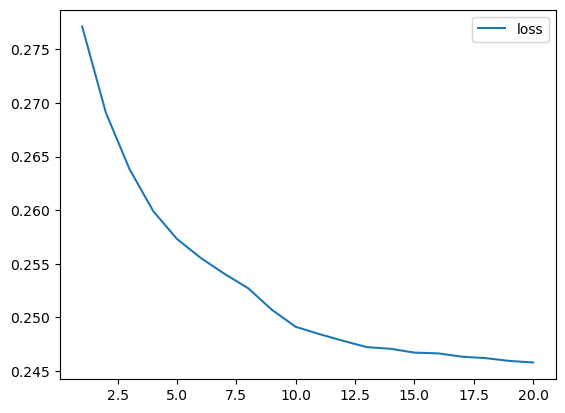

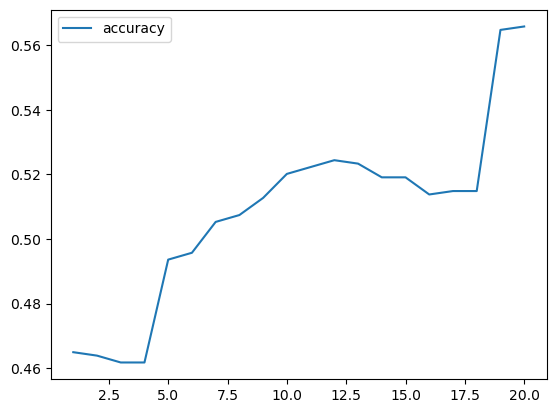

In [78]:
model_plot = pd.DataFrame(nn_model_fit.history, index=range(1, len(nn_model_fit.history["loss"]) + 1))
model_plot.plot(y="loss")
model_plot.plot(y="accuracy")

In [79]:
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.2510 - accuracy: 0.5175 - 26ms/epoch - 3ms/step
Loss: 0.2509533762931824, Accuracy: 0.5174603462219238


In [81]:
file_path = Path("model.h5")

nn_model.save(file_path)

In [88]:
target_predicition = (nn_model.predict(X_test_scaled) > .5.astype("int32"))

compare_df = pd.DataFrame(target_predicition, y_test)
compare_df

10/10 [==============================] - 0s 1ms/step


AttributeError: 'float' object has no attribute 'astype'